<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from numpy import sqrt, linspace, exp, pi, complex, real, imag
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (5, 5)

In [56]:
i = 1J
𝜋 = pi
n = 100 # points per side
θ = linspace( 0, 2*𝜋, 2*n-1 )

## **Joukowsky airfoil** 

$\Delta r$ - displacement in the real axis

$\Delta i$ - displacement in the imag axis

$a$ - circle radius

$c$ - circle center

$\zeta$ - circle coordinates in the $(\xi,\eta)$ plane

$z$ - Joukowsky airfoil coordinates in the $(x,y)$ plane

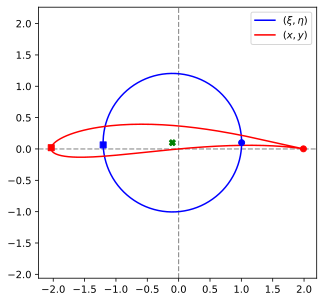

In [73]:
Δr = -0.1
Δi =  0.1

a = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = a * exp( i*θ ) + c
z = ζ + 1.0 / ζ

mpl.axis('equal')
mpl.axhline(y=0,lw=1,dashes=(5,2),color='0.5')
mpl.axvline(x=0,lw=1,dashes=(5,2),color='0.5')

mpl.plot( real(ζ), imag(ζ),'b', label=r'$(\xi,\eta)$')
mpl.plot( real(z), imag(z),'r', label=r'$(x,y)$')

# draw special points
mpl.plot( real(ζ[0]), imag(ζ[0]),'bo')
mpl.plot( real(z[0]), imag(z[0]),'ro')
mpl.plot( real(ζ[100]), imag(ζ[100]),'bs')
mpl.plot( real(z[100]), imag(z[100]),'rs')
mpl.plot( real(c), imag(c),'gX')

mpl.legend();